In [1]:
#Import Packages
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import enchant
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import gensim
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer

In [2]:
#Import and clean data
df = pd.read_csv('farmers_raw.csv')

In [3]:
df = df[df['question_language'] == 'eng']

In [4]:
df = df.drop_duplicates(subset=['question_id'], keep='first')

In [5]:
df = df.drop(columns=['question_language', 'question_topic', 'response_id', 'response_user_id', 'response_language', 'response_content', 'response_topic', 'response_sent', 'response_user_type', 'response_user_country_code', 'question_user_status', 'question_user_gender', 'question_user_dob', 'question_user_created_at', 'response_user_status', 'response_user_gender', 'response_user_dob', 'response_user_created_at'])

In [6]:
df['question_reduced'] = df['question_content'].str.lower()

In [7]:
df.head()

,question_id,question_user_id,question_content,question_sent,question_user_type,question_user_country_code,question_reduced
1,3849061,521327,Q this goes to wefarm. is it possible to get f...,2017-11-22 12:25:05+00,farmer,ug,q this goes to wefarm. is it possible to get f...
9,3849084,6642,Q-i have stock rabbit's urine for 5 weeks mash...,2017-11-22 12:25:10+00,farmer,ke,q-i have stock rabbit's urine for 5 weeks mash...
15,3849098,526375,Q J Have Mi 10000 Can J Start Aproject Of Pout...,2017-11-22 12:25:12+00,farmer,ug,q j have mi 10000 can j start aproject of pout...
16,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,2017-11-22 12:25:12+00,farmer,ke,where do i get seeds of coconut?
23,3849129,54426,Q#.Which plant has omega3?,2017-11-22 12:25:16+00,farmer,ke,q#.which plant has omega3?


## Preprocessing Question Text

In [8]:
#Remove Punctuation

In [9]:
df['question_reduced'] = df['question_reduced'].str.replace(r'[^0-9a-zA-Z\s]+', ' ', regex=True)

In [10]:
#Remove Stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = stopwords.words('english')

In [13]:
custom_stopwords = ['use','get','give','take','good','type','many','one','ask','well','want',
                    'make','know','see','look','need','help','tell','come', 'best', 'much', 'well', 'long',
                    'question', 'wont']
stop_words.extend(custom_stopwords)

In [14]:
#Tokenize Text
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [15]:
df['question_reduced'] = df['question_reduced'].apply(tokenize)

In [16]:
df.head()

,question_id,question_user_id,question_content,question_sent,question_user_type,question_user_country_code,question_reduced
1,3849061,521327,Q this goes to wefarm. is it possible to get f...,2017-11-22 12:25:05+00,farmer,ug,"[goes, wefarm, possible, us, market, product, ..."
9,3849084,6642,Q-i have stock rabbit's urine for 5 weeks mash...,2017-11-22 12:25:10+00,farmer,ke,"[stock, rabbit, urine, weeks, mashambani, stor..."
15,3849098,526375,Q J Have Mi 10000 Can J Start Aproject Of Pout...,2017-11-22 12:25:12+00,farmer,ug,"[mi, start, aproject, poutry]"
16,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,2017-11-22 12:25:12+00,farmer,ke,"[seeds, coconut]"
23,3849129,54426,Q#.Which plant has omega3?,2017-11-22 12:25:16+00,farmer,ke,"[plant, omega]"


In [18]:
#Lemmatize Text
lemmatizer = WordNetLemmatizer()
def lemmatize_word_list(word_list):
    return [lemmatizer.lemmatize(word) for word in word_list]

In [19]:
df['question_reduced'] = df['question_reduced'].apply(lemmatize_word_list)

In [20]:
df.head()

,question_id,question_user_id,question_content,question_sent,question_user_type,question_user_country_code,question_reduced
1,3849061,521327,Q this goes to wefarm. is it possible to get f...,2017-11-22 12:25:05+00,farmer,ug,"[go, wefarm, possible, u, market, product, thax]"
9,3849084,6642,Q-i have stock rabbit's urine for 5 weeks mash...,2017-11-22 12:25:10+00,farmer,ke,"[stock, rabbit, urine, week, mashambani, store..."
15,3849098,526375,Q J Have Mi 10000 Can J Start Aproject Of Pout...,2017-11-22 12:25:12+00,farmer,ug,"[mi, start, aproject, poutry]"
16,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,2017-11-22 12:25:12+00,farmer,ke,"[seed, coconut]"
23,3849129,54426,Q#.Which plant has omega3?,2017-11-22 12:25:16+00,farmer,ke,"[plant, omega]"


## Calculating Word Counts

Here we will create a table of each key word that comes up in the questions and count how often they occur

In [28]:
exp_questions = df['question_reduced'].explode()

In [29]:
word_counts = exp_questions.value_counts()

In [30]:
df_words = word_counts.to_frame()

In [32]:
df_words = df_words.reset_index()

In [37]:
df_words.rename(columns={'question_reduced':'word'}, inplace=True)

In [38]:
df_words.head()

,word,count
0,maize,238325
1,plant,222279
2,cow,186309
3,tomato,146150
4,asks,102286


In [39]:
#Drop 1-2 letter words

In [40]:
df_words = df_words[df_words['word'].str.len() >= 3] 

In [41]:
df_words

,word,count
0,maize,238325
1,plant,222279
2,cow,186309
3,tomato,146150
4,asks,102286
...,...,...
257240,unfeet,1
257241,ukonaye,1
257242,anichanue,1
257243,kibigei,1


In [42]:
#Drop numbers and words not found in english dictionary

In [43]:
dictionary = enchant.Dict("en_US")
def is_real_word(word):
    if word.isdigit() == True:
        return False
    return dictionary.check(word)

In [44]:
df_words['is_word'] = df_words['word'].apply(is_real_word)
df_words = df_words[df_words['is_word'] == True]
df_words = df_words.drop('is_word', axis=1)

C:\Users\jackl\AppData\Local\Temp\ipykernel_13416\1768183473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words['is_word'] = df_words['word'].apply(is_real_word)


In [45]:
df_words

,word,count
0,maize,238325
1,plant,222279
2,cow,186309
3,tomato,146150
4,asks,102286
...,...,...
257079,comprehension,1
257095,highers,1
257141,joyously,1
257143,reposed,1


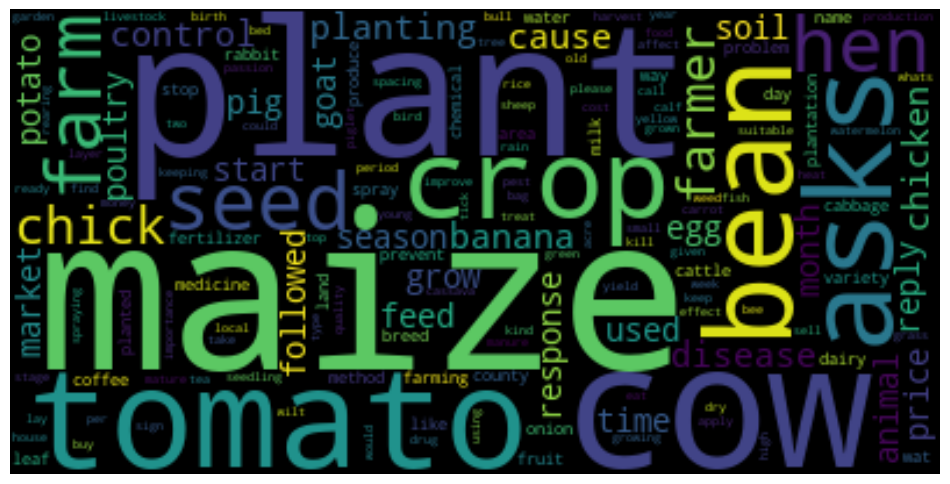

In [50]:
word_counts = df_words.groupby('word')['count'].sum().to_dict()

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Measure Word Association

Here we would like to know which questions are related to selling farm goods on the market. The way we'll do it here is by identifying which words used in the questions asked are most similar to the word 'sell' and checking which questions contain those similar words.

In [52]:
nlp = spacy.load("en_core_web_lg")

In [53]:
df_sim = df_words.copy()

In [54]:
nlp = spacy.load("en_core_web_lg")

In [55]:
def sell_similarity_score(word):
    target_word = nlp('sell')
    return nlp(word).similarity(target_word)

In [68]:
df_sim['sim_score'] = df_sim['word'].apply(sell_similarity_score)

C:\Users\jackl\AppData\Local\Temp\ipykernel_13416\746679288.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return nlp(word).similarity(target_word)


We'll take the top 25 words that are closest to the word "sell". This should provide enough question variety without incorporating questions too dissimilar

In [70]:
top_25_sell_words = df_sim.sort_values(by='sim_score', ascending=False).head(25)
top_25_sell_words = top_25_sell_words['word'].tolist()
top_25_sell_words

['sell',
 'selling',
 'buy',
 'buying',
 'sold',
 'purchase',
 'sale',
 'bought',
 'purchased',
 'purchasing',
 'resell',
 'afford',
 'cheaper',
 'price',
 'invest',
 'market',
 'resale',
 'money',
 'priced',
 'want',
 'bargain',
 'buyer',
 'auction',
 'deal',
 'advertise']

In [59]:
df_sell_questions = df.copy()

In [61]:
df_sell_questions['is_sell_question'] = df_sell_questions['question_reduced'].apply(
    lambda x: bool(set(x) & set(top_25_sell_words))
)

In [62]:
df_sell_questions

,question_id,question_user_id,question_content,question_sent,question_user_type,question_user_country_code,question_reduced,is_sell_question
1,3849061,521327,Q this goes to wefarm. is it possible to get f...,2017-11-22 12:25:05+00,farmer,ug,"[go, wefarm, possible, u, market, product, thax]",True
9,3849084,6642,Q-i have stock rabbit's urine for 5 weeks mash...,2017-11-22 12:25:10+00,farmer,ke,"[stock, rabbit, urine, week, mashambani, store...",False
15,3849098,526375,Q J Have Mi 10000 Can J Start Aproject Of Pout...,2017-11-22 12:25:12+00,farmer,ug,"[mi, start, aproject, poutry]",False
16,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,2017-11-22 12:25:12+00,farmer,ke,"[seed, coconut]",False
23,3849129,54426,Q#.Which plant has omega3?,2017-11-22 12:25:16+00,farmer,ke,"[plant, omega]",False
...,...,...,...,...,...,...,...,...
20304834,59256156,2709472,How much can i get in onion 1acre,2022-04-14 14:09:31.207572+00,farmer,ke,"[onion, acre]",False
20304835,59256225,1904306,Q which crop should we plant in this very litt...,2022-04-14 18:53:58.175585+00,farmer,ke,"[crop, plant, little, rain]",False
20304839,59259045,2772369,I want to grow cabbage someone to give me the ...,2022-05-12 11:30:05.74955+00,farmer,ke,"[grow, cabbage, someone, proceducer, please]",False
20304840,59260982,110220,Q how can i permanently control birds destroyi...,2022-06-11 11:52:34.4472+00,farmer,ke,"[permanently, control, bird, destroying, maize...",False


In [63]:
df_sell_questions.to_csv('sell_questions.csv', index=False)

Questions have now been marked True/False whether they are a question related to selling or not. We can use this to see when these questions most often occur.